# <font size='6' color='darkorange' face='Courier New'>**Sea Level Predictor**</font>
<hr style="margin-bottom: 40px;">


In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use ('dark_background')
from scipy.stats import linregress

## Используйте Pandas для импорта данных из `epa-sea-level.csv`

In [2]:
# чтение файла с данными и сохранение в df
# получение первых 5 строк таблицы df
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
# изменяем название колонки
df.rename(columns={'CSIRO Adjusted Sea Level': 'AS'}, inplace=True)

## Используйте matplotlib, чтобы создать точечную диаграмму, используя столбец `Year` в качестве оси `x` и столбец `CSIRO Adjusted Sea Level` в качестве оси `y`.

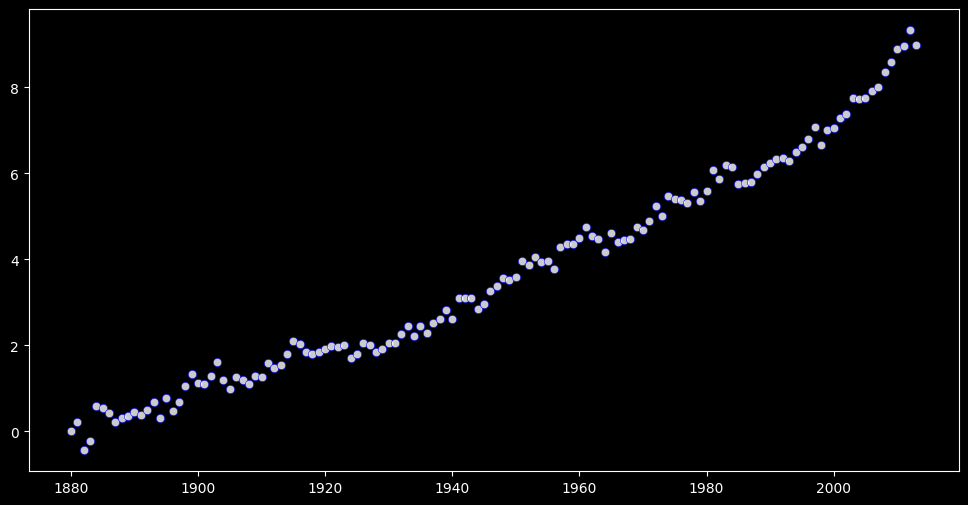

In [5]:
# определяем габариты и строим точечную диаграмму
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x = df['Year'], y = df['AS'], color = 'white', edgecolors = 'blue', linewidths = 0.5, alpha = 0.8)

## Используйте функцию линейной регрессии из `scipy.stats`, чтобы получить наклон и y-пересечение линии наилучшего соответствия.
* Нанесите линию наилучшего соответствия поверх графика рассеяния.
* Проведите линию через 2050 год, чтобы предсказать повышение уровня моря в 2050 году.

In [6]:
# используем функцию линейной регрессии
red_lin = linregress(df['Year'], df['AS'])
red_lin

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

<ipython-input-8-6229c670dd27>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{'Year': y} for y in range(max_year + 1, 2050)])


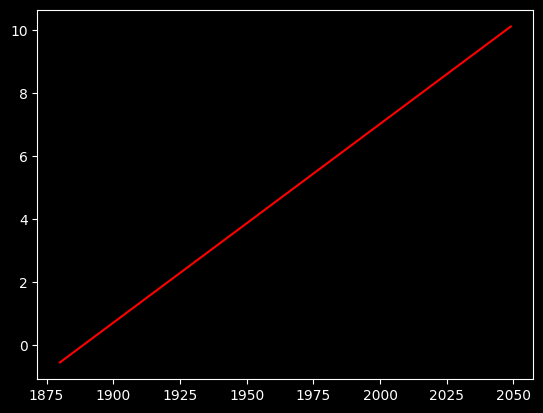

In [8]:
# увеличиваем данные для прогноза до 2050

# узнаем максимыльный год
max_year = df['Year'].max()

# добавляем новые данные, используя ф-цию 'append' через цикл for до 2050
df = df.append([{'Year': y} for y in range(max_year + 1, 2050)])

# строим график с помощью лин.регрессии используя наклон + пересечение
plt.plot(df['Year'], red_lin.intercept + red_lin.slope * df['Year'], color = 'red')

## Постройте новую линию наилучшего соответствия, используя данные с 2000 года по самый последний год в наборе данных.
Проведите линию также через 2050 год, чтобы предсказать повышение уровня моря в 2050 году, если темпы повышения сохранятся такими же, как с 2000 года.

<ipython-input-11-076667dfb125>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recentyear = df_recentyear.append([{'Year': y} for y in range(max_year + 1, 2050)])


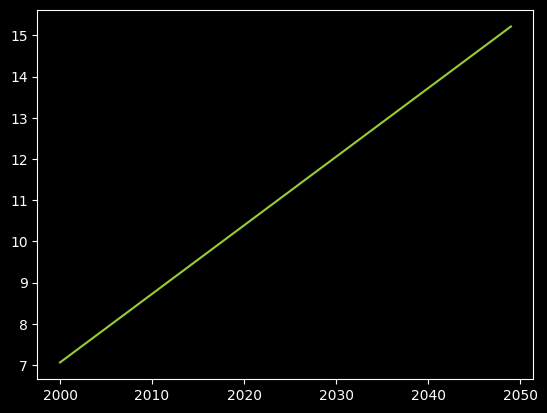

In [11]:
# строим линию наилучшего соответсвия c 2000 по 2050 г

# получим данные между 2000 и 2013 используя ф-цию loc
df_recentyear = df.loc[(df['Year'] >= 2000) & (df['Year'] <= max_year)]

# используем функцию линейной регрессии
gre_lin = linregress(df_recentyear['Year'], df_recentyear['AS'])

# добавляем новые данные, используя ф-цию 'append' через цикл for до 2050
df_recentyear = df_recentyear.append([{'Year': y} for y in range(max_year + 1, 2050)])

# строим график с помощью лин.регрессии используя наклон + пересечение
plt.plot(df_recentyear['Year'], gre_lin.intercept + gre_lin.slope * df_recentyear['Year'], color = 'yellowgreen')

Text(0.5, 1.0, 'Rise in Sea Level')

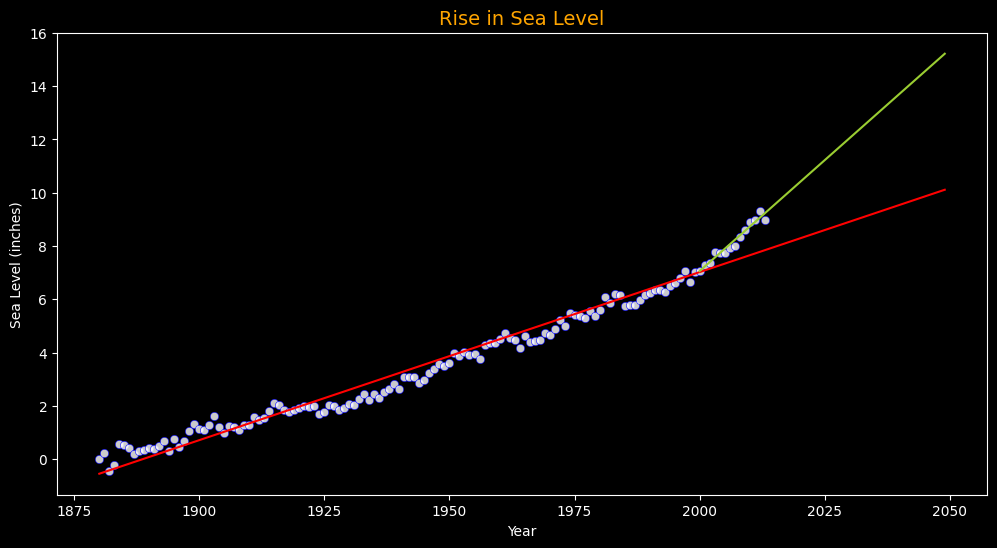

In [ ]:
# окончательный график (объединяем 3 графика в 1)

# точечная диаграмма
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x = df['Year'], y = df['AS'], color = 'white', edgecolors = 'blue', linewidths = 0.5, alpha = 0.8)

# red линия (1880-2050)
plt.plot(df['Year'], red_lin.intercept + red_lin.slope * df['Year'], color = 'red')

# gre линия (2000-2050)
plt.plot(df_recentyear['Year'], gre_lin.intercept + gre_lin.slope * df_recentyear['Year'], color = 'yellowgreen')

# добавляем заголовки по осям и название графика
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Sea Level (inches)', fontsize = 10)
plt.title('Rise in Sea Level', fontsize = 14, color = 'orange')